# Data Analysis

In [37]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import os

pd.options.display.max_colwidth = 200

# get current directory
path = os.getcwd()
parent = os.path.dirname(path)

DIR_DATA = parent+ '/data/'

### EDA 

In [38]:
df_loans = pd.read_csv(DIR_DATA+'infringment_processed.csv')
df_columns = pd.read_csv(DIR_DATA+'columns_description.csv')
df_loans

,loan_id,infringed,contract_type,gender,has_own_car,has_own_realty,num_children,annual_income,credit_amount,credit_annuity,...,num_req_bureau_year,avg_days_decision,past_avg_amount_annuity,past_avg_amt_application,past_avg_amt_credit,past_loans_approved,past_loans_refused,past_loans_canceled,past_loans_unused,past_loans_total
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1,606.000000,9251.775000,179055.000,179055.00,1,0,0,0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,1305.000000,56553.990000,435436.500,484191.00,3,0,0,0,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,815.000000,5357.250000,24282.000,20106.00,1,0,0,0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,1222.833333,12278.805000,150530.250,166638.75,6,0,0,0,6
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,1,1192.000000,15839.696250,155701.800,162767.70,4,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456246,0,Cash loans,F,N,Y,1,94500.0,225000.0,10620.0,...,1,897.000000,6748.830000,18015.750,84046.50,2,0,0,0,2
307503,456247,0,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,...,2,1387.800000,10466.921250,59832.900,59184.00,4,0,1,0,5
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,1,2380.000000,4770.405000,24162.750,20625.75,2,0,0,0,2
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,299.500000,10681.132500,121317.750,134439.75,2,0,0,0,2


#### #1 - Past Loan Information
This can help profiling clients who can provide more loan contract risk, making ControlER more alert to risk assessment and make a more accurate decision.

In [39]:
df_loans['infringed'].value_counts()

0    189025
1     17391
Name: infringed, dtype: int64

Since there are more loans without infringment, first we get a random sample of the same size of the number of loans with infringments so we can equally evaluate their information.

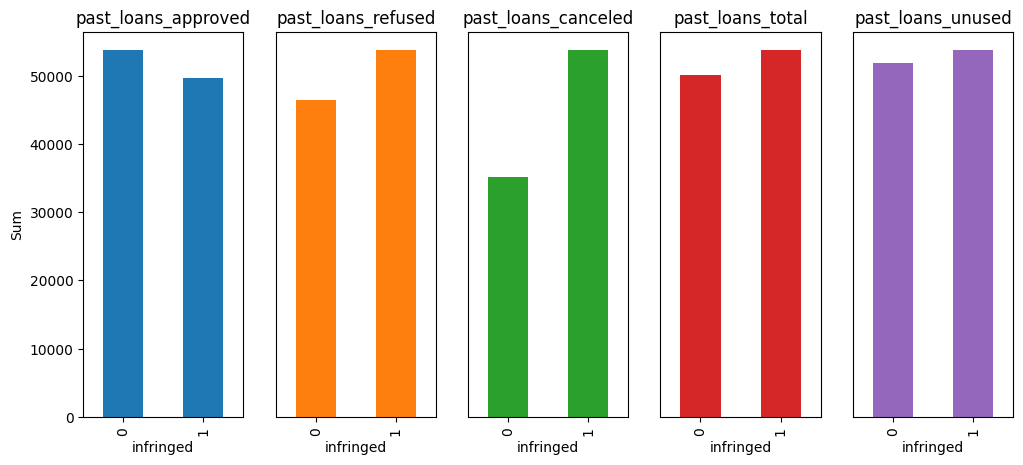

In [40]:
df_not_infringed = df_loans[df_loans['infringed'] == 0]
df_infringed = df_loans[df_loans['infringed'] == 1]

df_not_infringed_sample = df_not_infringed.sample(df_infringed.shape[0])

df_loans_plot = pd.concat([df_infringed,df_not_infringed_sample])

cols_past = ['past_loans_approved','past_loans_refused','past_loans_canceled','past_loans_total','past_loans_unused']

axes= df_loans_plot.groupby('infringed')[cols_past].sum().plot(kind='bar',sharex= True,subplots = True,layout = (1,5),legend = False,figsize = (12,5))
axes[0][0].set_ylabel('Sum')
axes[0][1].yaxis.set_visible(False)
axes[0][2].yaxis.set_visible(False)
axes[0][3].yaxis.set_visible(False)
axes[0][4].yaxis.set_visible(False)
df_loans_plot.groupby('infringed')[cols_past].sum()
plt.savefig('past_analysis.jpeg')


- We can observe in the plot clients with infringed loan contracts have more past loans refused, canceled and less approved compared to the other group. 
- The information about the unsued and total past loans didn´t tell us much.

Conclusion: This analysis makes sense since clients with more refused or canceled past loans have more likely to have infringe a loan contract. And vice-versa, clients with more approved past loans are more likely to not have infringed the contract.

### #2 - Percentage of infringments of each organization type

The purpose of this analysis is to observe what are the organization sections which have more loan contract infringments. This can help identify in the future which type of clients could potentally give more infringment risks to ControlER.

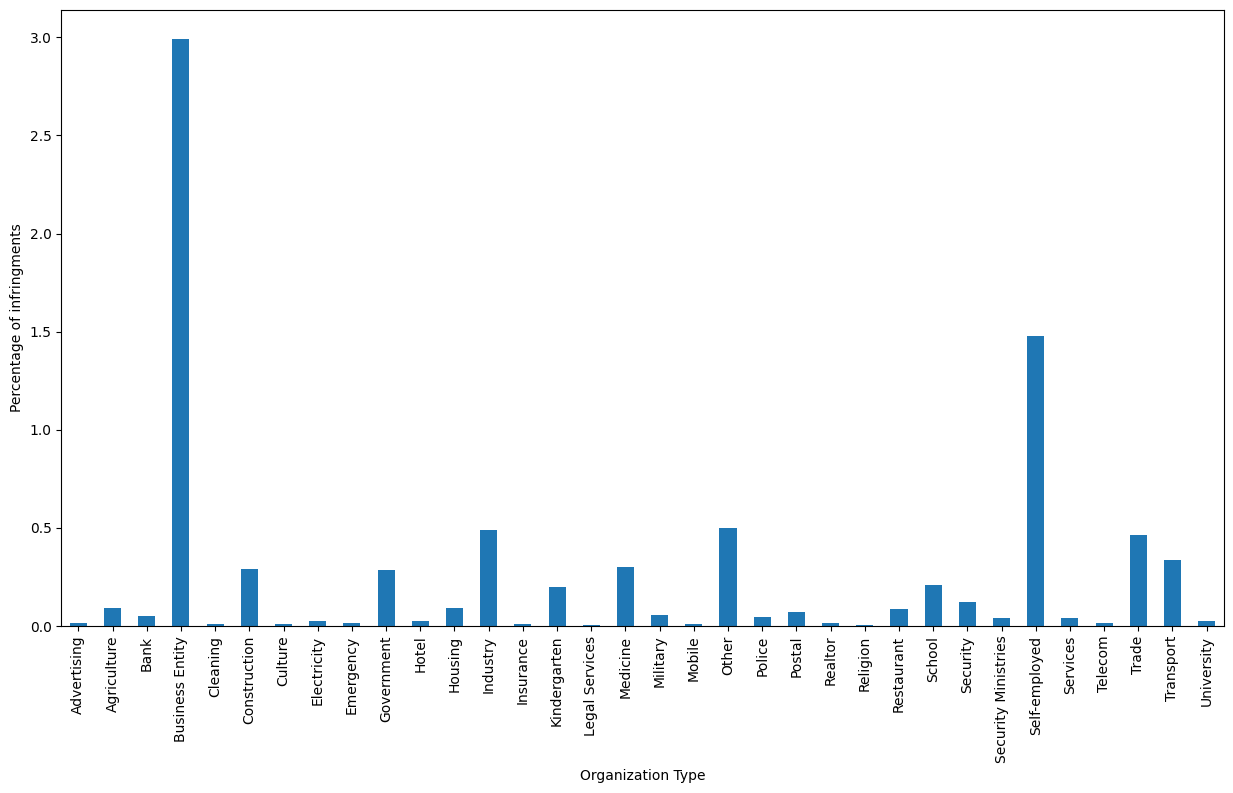

In [41]:
df_infringed_percent_organization = (df_infringed.groupby('organization_type')['infringed'].count()*100)/df_loans.shape[0]
df_infringed_percent_organization.plot(kind='bar',figsize = (15,8),ylabel = 'Percentage of infringments', xlabel = 'Organization Type')
df_infringed_percent_organization
plt.savefig('organization_analysis.jpeg')

Bussiness entities and Industry workers have 3% and 1.5% percentage of the total infringments, respectively, therefore being the sections that Controler could have more risk aproving loan contracts. 

Possible reasons for this distribution:
- Business Entities may ask for a loan to finance a new product they want to develop and it doesen´t go so well
- Self-Employed workers are more suscetiple to infringments since they have full responsibilty for their finance and business. Therefore they are more unstable and can easily earn a lot of money as well to losing it. For example, theese type of workers normalyy ask for a loan to finnace their start-up which scientifically are more likely ti fail than suceed.
- Organizations like Construction, Government and University are in the heart of every country, they are central services for the economy and development as a country. So sections like these always have steady income.